This notebook is for us to pull statistics out of the dataset.
Particularly:
- demographics

In [1]:
import os
import yaml
import pickle

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

# Data

In [2]:
with open('../../data/post_test/questions.pkl', 'rb') as fp:
    questions = pickle.load(fp)
    
with open('../../data/post_test/some_questions.pkl', 'rb') as fp:
    some_questions = pickle.load(fp)
    
with open('../../data/post_test/rankings.pkl', 'rb') as fp:
    rankings = pickle.load(fp)
    
all_data = (questions.append(some_questions)).append(rankings).drop_duplicates(['username'])

In [8]:
data = all_data.copy()

# Functions

In [42]:
# Colour palette
palette = {
    '1st': '#D4E6B5',
    '2nd': '#AFC97E',
    '3rd': '#A2A3BB',
    '1.0': '#BFD1E5', # Gender
    '2.0': '#EBF5EE',
    '3.0': '#D8BFAA',
    '4.0': '#EB9486',
    'Chemistry, Textiles': '#335C67',
    'Chemistry': '#FFF3B0',
    'Biology': '#E09F3E',
    'Pharma Chemistry': '#9E2A2B',
    'Fast track': '#540B0E',
    '0': '#92B4F4',
    '1': '#CFDEE7',
    '2': '#F46197',
    '3': '#AF7595'
}


In [34]:
def get_bar_data(data, plot_col:str, unique_identifier:str):
    new_data = data[[plot_col, unique_identifier]].groupby(plot_col).nunique()[[unique_identifier]].reset_index()
    return new_data[plot_col].astype(str), new_data[unique_identifier]

In [74]:
# Gender per field
def get_gender_field(data, gender, field):
    new_data = data[data['gender'] == gender]
    new_data = new_data[new_data['field'] == field]
    return new_data

# Gender per field
def get_gender_field(data, gender, field):
    new_data = data[data['gender'] == gender]
    new_data = new_data[new_data['field'] == field]
    return new_data

## Overall statistics

In [163]:
gender1 = get_gender_field(data, 1.0, 'Fast track')
gender2 = get_gender_field(data, 2.0, 'Fast track')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
bars1, bars2 = list(bars1), list(bars2)
bars1.append(0)
bars2.append(0)

In [164]:
bars1

[3, 0]

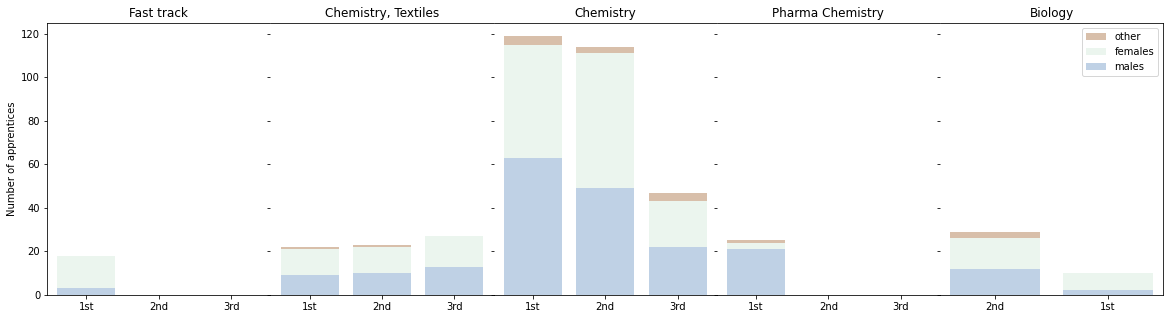

In [178]:
# Plot configuration
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 5))
x = ['1st', '2nd', '3rd']

                           
# Fast Track
gender1 = get_gender_field(data, 1.0, 'Fast track')
gender2 = get_gender_field(data, 2.0, 'Fast track')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
bars1, bars2 = list(bars1), list(bars2)
bars1, bars2 = bars1 + [0, 0], bars2 + [0, 0]

bars = np.array(bars2) + np.array(bars1)
axs[0].bar(x, bars, label='gender 2', color=palette['2.0'])

bars = bars - np.array(bars2)
axs[0].bar(x, bars, label='gender 1', color=palette['1.0'])
axs[0].set_title('Fast track')


# Chemistry, Textiles
gender1 = get_gender_field(data, 1.0, 'Chemistry, Textiles')
gender2 = get_gender_field(data, 2.0, 'Chemistry, Textiles')
gender3 = get_gender_field(data, 3.0, 'Chemistry, Textiles')
gender4 = get_gender_field(data, 4.0, 'Chemistry, Textiles')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
x3, bars3 = get_bar_data(gender3, 'year', 'username')
bars3 = list(bars3) # Hack
bars3.append(0)
x4, bars4 = get_bar_data(gender4, 'year', 'username')

bars = np.array(bars3) + np.array(bars2) + np.array(bars1)
axs[1].bar(x1, bars, label='gender 3', color=palette['3.0'])

bars = bars - np.array(bars3)
axs[1].bar(x2, bars, label='gender 2', color=palette['2.0'])

bars = bars - np.array(bars2)
axs[1].bar(x1, bars, label='gender 1', color=palette['1.0'])
axs[1].set_title('Chemistry, Textiles')


# Chemistry
gender1 = get_gender_field(data, 1., 'Chemistry')
gender2 = get_gender_field(data, 2., 'Chemistry')
gender3 = get_gender_field(data, 3., 'Chemistry')
gender4 = get_gender_field(data, 4., 'Chemistry')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
x3, bars3 = get_bar_data(gender3, 'year', 'username')
x4, bars4 = get_bar_data(gender4, 'year', 'username')

bars = np.array(bars4) + np.array(bars3) + np.array(bars2) + np.array(bars1)
axs[2].bar(x4, bars, label='gender 3', color=palette['3.0'])

bars = bars - np.array(bars4)
bars = bars - np.array(bars3)
axs[2].bar(x2, bars, label='gender 2', color=palette['2.0'])

bars = bars - np.array(bars2)
axs[2].bar(x1, bars, label='gender 1', color=palette['1.0'])
axs[2].set_title('Chemistry')

                           
# Pharma Chemistry
gender1 = get_gender_field(data, 1.0, 'Pharma Chemistry')
gender2 = get_gender_field(data, 2.0, 'Pharma Chemistry')
gender3 = get_gender_field(data, 3.0, 'Pharma Chemistry')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
x3, bars3 = get_bar_data(gender3, 'year', 'username')
bars1, bars2, bars3 = list(bars1), list(bars2), list(bars3)
bars1, bars2, bars3 = bars1 + [0, 0], bars2 + [0, 0], bars3 + [0, 0]

bars = np.array(bars3) + np.array(bars2) + np.array(bars1)
axs[3].bar(x, bars, label='gender 3', color=palette['3.0'])

bars = bars - np.array(bars3)
axs[3].bar(x, bars, label='gender 2', color=palette['2.0'])

bars = bars - np.array(bars2)
axs[3].bar(x, bars, label='gender 1', color=palette['1.0'])
axs[3].set_title('Pharma Chemistry')



# Biology
gender1 = get_gender_field(data, 1.0, 'Biology')
gender2 = get_gender_field(data, 2.0, 'Biology')
gender3 = get_gender_field(data, 3.0, 'Biology')
gender4 = get_gender_field(data, 4.0, 'Biology')

x1, bars1 = get_bar_data(gender1, 'year', 'username')
x2, bars2 = get_bar_data(gender2, 'year', 'username')
x3, bars3 = get_bar_data(gender3, 'year', 'username')
x4, bars4 = get_bar_data(gender4, 'year', 'username')

bars = np.array(bars4) + np.array(bars3) + np.array(bars2) + np.array(bars1)
axs[4].bar(x4, bars, label='other', color=palette['3.0'])

bars = bars - np.array(bars4)
bars = bars - np.array(bars3)
axs[4].bar(x2, bars, label='females', color=palette['2.0'])

bars = bars - np.array(bars2)
axs[4].bar(x1, bars, label='males', color=palette['1.0'])
axs[4].set_title('Biology')

axs[1].spines['left'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[3].spines['left'].set_visible(False)
axs[4].spines['left'].set_visible(False)
axs[0].set_ylabel('Number of apprentices')

plt.subplots_adjust(wspace=0, hspace=0)
plt.legend()
plt.savefig('../../reports/SRIA/summary_plot.svg', format='svg')
plt.show()